<a href="https://colab.research.google.com/github/callmeAyanda/Machine-Learning/blob/main/HousePrices_LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


exploring the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


checking for missing values

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
copied_data = data.copy()
copied_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
copied_data['mainroad'].unique()

array([0, 1])

In [ ]:
copied_data['mainroad'] = copied_data['mainroad'].map({'yes':0,'no':1})

In [ ]:
copied_data['guestroom'].unique()

array([1, 0])

In [ ]:
copied_data['guestroom'] = copied_data['guestroom'].map({'yes':0,'no':1})

In [ ]:
copied_data['basement'].unique()

array([1, 0])

In [ ]:
copied_data['basement'] = copied_data['basement'].map({'yes':0,'no':1})

In [ ]:
copied_data['hotwaterheating'].unique()

array([1, 0])

In [ ]:
copied_data['hotwaterheating'] = copied_data['hotwaterheating'].map({'yes':0,'no':1})

In [ ]:
copied_data['airconditioning'].unique()

array([0, 1])

In [ ]:
copied_data['airconditioning'] = copied_data['airconditioning'].map({'yes':0,'no':1})

In [ ]:
copied_data['prefarea'].unique()

array([0, 1])

In [ ]:
copied_data['prefarea'] = copied_data['prefarea'].map({'yes':0,'no':1})

In [ ]:
copied_data['furnishingstatus'].unique()

KeyError: 'furnishingstatus'

In [ ]:
furnishingstatus_dummies = pd.get_dummies(copied_data['furnishingstatus'])
merged = pd.concat([copied_data,furnishingstatus_dummies],axis='columns')
copied_data = merged.drop(['furnishingstatus'],axis='columns')
copied_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,True,False,False
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,True,False,False
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,False,True,False
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,True,False,False
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,False,False,True
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,False,True,False
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,False,False,True
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,True,False,False


In [ ]:
# Drop the 'furnished' column to avoid the dummy variable trap
copied_data.drop(['furnished'], axis='columns', inplace=True)


In [ ]:
copied_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1,0
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,0,1
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1,0
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,0,1
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,0,0


In [ ]:
# Convert the boolean columns to integers (0s and 1s)
copied_data['semi-furnished'] = copied_data['semi-furnished'].astype(int)
copied_data['unfurnished'] = copied_data['unfurnished'].astype(int)


In [ ]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    int64
 13  unfurnished      545 non-null    int64
dtypes: int64(14)
memory usage: 59.7 KB


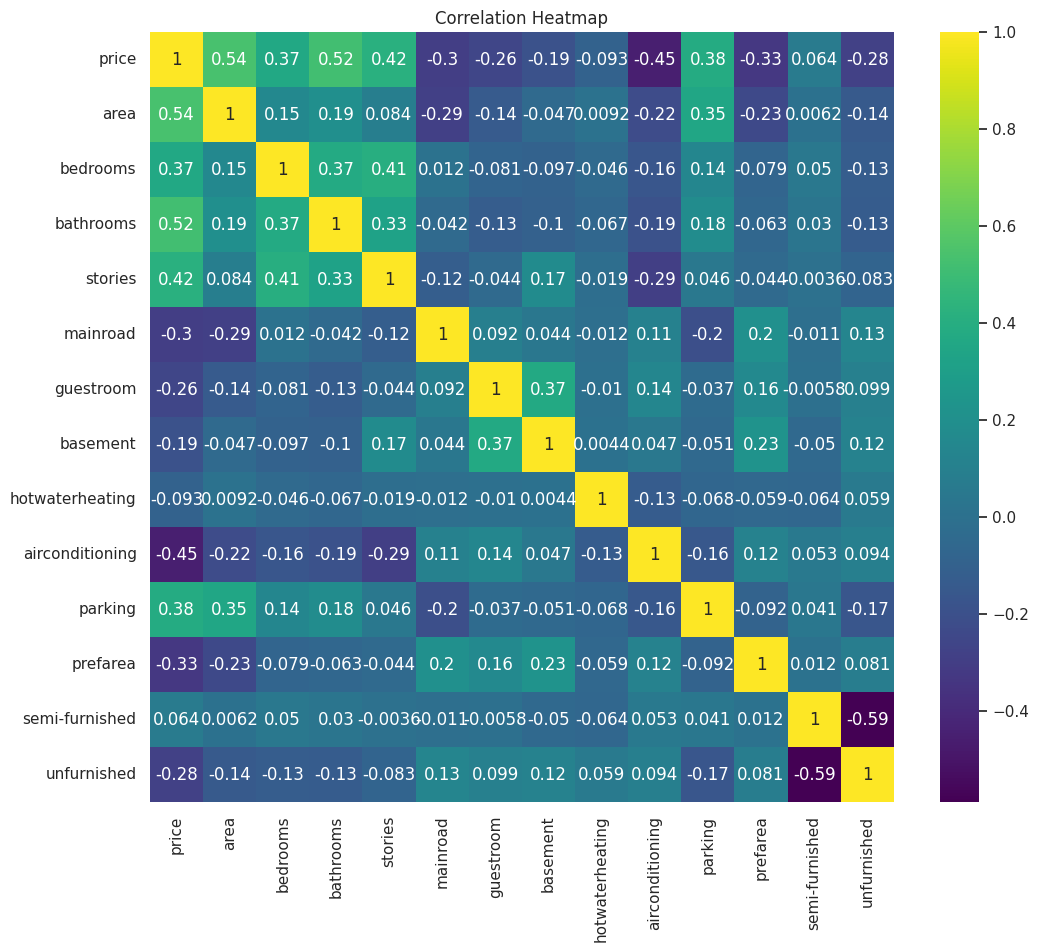

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(copied_data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

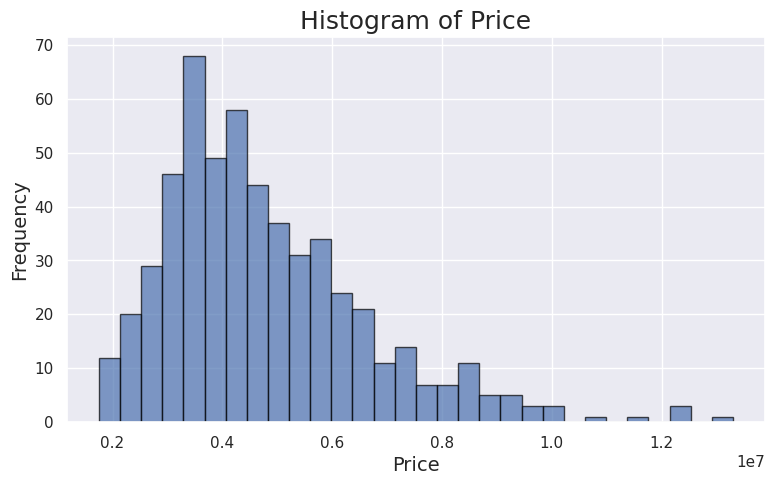

In [ ]:
plt.figure(figsize=(9, 5))  # Set the figure size

# Replace 'column_name' with the actual name of the column you want to plot
plt.hist(copied_data['price'], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Price', fontsize=18)

plt.show()


Histogram without the outliers

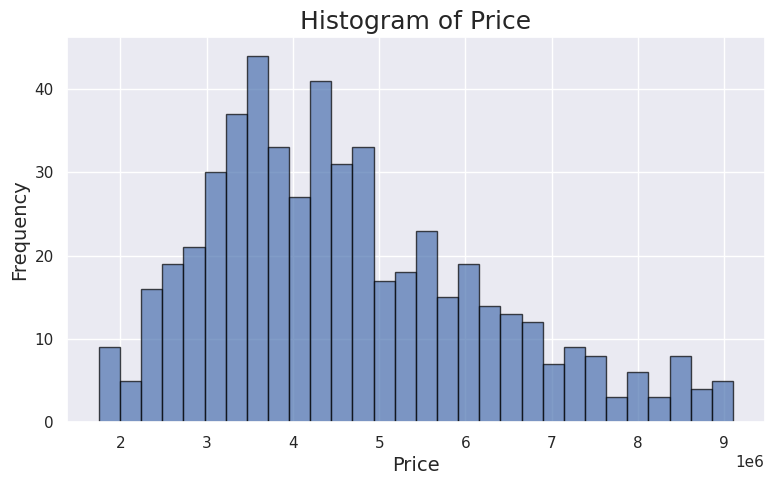

In [ ]:
# Step 1: Calculate Q1 and Q3
Q1 = copied_data['price'].quantile(0.25)
Q3 = copied_data['price'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the dataset to remove outliers
filtered_data = copied_data[(copied_data['price'] >= lower_bound) & (copied_data['price'] <= upper_bound)]

plt.figure(figsize=(9, 5))  # Set the figure size

# Replace 'column_name' with the actual name of the column you want to plot
plt.hist(filtered_data['price'], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Price', fontsize=18)

plt.show()


defining the dependent and independent variables

In [ ]:
# Define the independent variables (X)
x = copied_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                 'guestroom', 'basement', 'hotwaterheating',
                 'airconditioning', 'parking', 'prefarea',
                 'semi-furnished', 'unfurnished']]

# Define the dependent variable (y)
y = copied_data['price']


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score


this is to standardadize the values

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

this is checking the significance of each independent value to decide whether we remove it or keep it. in this case we realize that most of the p-values are low making them statistically significance so we keep them.

In [ ]:
f_values, p_values = f_regression(x_scaled, y)
print('F-values: ', f_values)
print('P-values: ', p_values)

F-values:  [218.88408118  84.25102178 198.65452062 116.78040217  52.49183918
  37.92827585  19.68856916   4.74486966 140.16272089  94.14332782
  66.25864622   2.20925846  46.40328768]
P-values:  [7.38822540e-42 9.08030186e-19 1.13932184e-38 8.66839738e-25
 1.49010415e-12 1.42911364e-09 1.10410519e-05 2.98152390e-02
 6.31096985e-29 1.23837844e-20 2.71837447e-15 1.37764974e-01
 2.56180043e-11]


now we are spliting our data into training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

looking for the R-squared, in this case we realize that 65% of our data can be explained by the model

In [ ]:
r_squared = regressor.score(x_test, y_test)
print('R-squared: ', r_squared)

R-squared:  0.6529242642153176


checking for the adjusted r-squared, meaning if the model is good by chance or not, we know that an adj r-squared higher than the r-squared(or 0.5) means the model is good

in this case we see an adjusted r-squared of 60%, meaning it is reasonably good but can further improve

In [ ]:
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print('Adjusted R-squared: ', adjusted_r_squared)

Adjusted R-squared:  0.6054296898447821


visualising the results

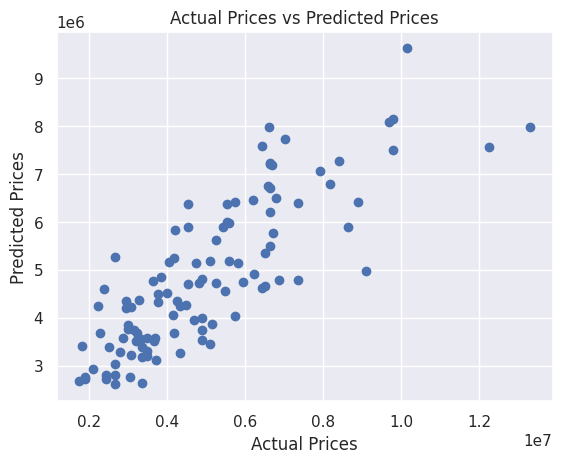

In [ ]:
plt.scatter(y_test, regressor.predict(x_test))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
x_train_with_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           2.16e-97
Time:                        16:22:56   Log-Likelihood:                -6635.2
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     422   BIC:                         1.336e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.738e+06    4.8e+04     98.688      0.0